<a href="https://colab.research.google.com/github/wacosta86/talento_tech_data_analyst_integrator/blob/main/Ejercicio_en_clase_(iris).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para el conjunto de iris, calcular el promedio de las medidas de las flores de cada especie. Una vez se tengan los promedios de las tres especies, calcular la distancia Manhattan y euclidiana entre cada par de promedios. Graficar las distancias y sacar conclusiones de lo observado.

In [ ]:
import pandas as pd

# Load the Iris dataset
iris_url = 'https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'
iris_data = pd.read_csv(iris_url)

In [ ]:
# Calculate the average measurements of the flowers for each species
average_per_species = iris_data.groupby('species').mean()

# Display the average per species
print(average_per_species)

            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026


In [ ]:
from scipy.spatial.distance import pdist, cdist
import numpy as np

# Calculate Manhattan and Euclidean distance between each pair of averages
dist_manhattan = pdist(average_per_species, metric='cityblock')
dist_euclidean = pdist(average_per_species, metric='euclidean')

# Convert distances to a square matrix
dist_manhattan_matrix = cdist(average_per_species, average_per_species, metric='cityblock')
dist_euclidean_matrix = cdist(average_per_species, average_per_species, metric='euclidean')

# Display the distances
print("Manhattan distance between each pair of averages:")
print(dist_manhattan)
print("\nEuclidean distance between each pair of averages:")
print(dist_euclidean)

print("\nManhattan distance matrix:")
print(dist_manhattan_matrix)
print("\nEuclidean distance matrix:")
print(dist_euclidean_matrix)

Manhattan distance between each pair of averages:
[5.456 7.896 2.848]

Euclidean distance between each pair of averages:
[3.20517457 4.75259171 1.62048882]

Manhattan distance matrix:
[[0.    5.456 7.896]
 [5.456 0.    2.848]
 [7.896 2.848 0.   ]]

Euclidean distance matrix:
[[0.         3.20517457 4.75259171]
 [3.20517457 0.         1.62048882]
 [4.75259171 1.62048882 0.        ]]


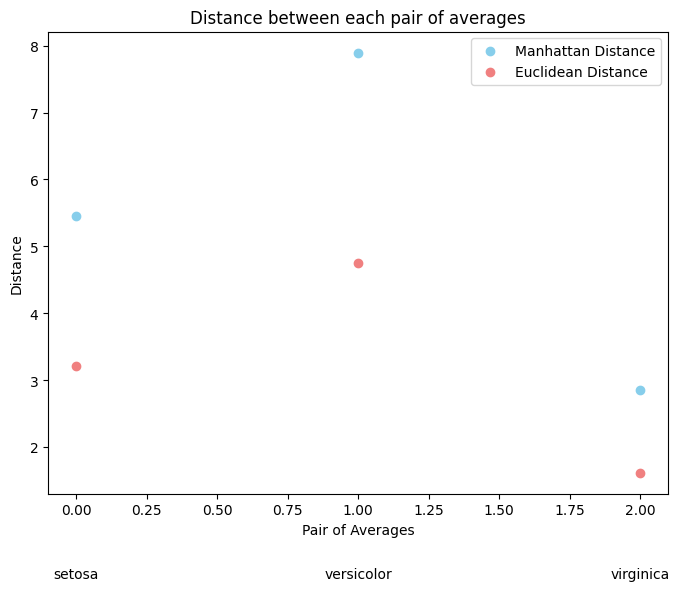

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con un solo subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar la distancia Manhattan
manhattan = ax.scatter(range(len(dist_manhattan)), dist_manhattan, color='skyblue', label='Manhattan Distance')
# Graficar la distancia Euclidiana
euclidean = ax.scatter(range(len(dist_euclidean)), dist_euclidean, color='lightcoral', label='Euclidean Distance')

# Agregar etiquetas de especies
species_labels = average_per_species.index
for i, species in enumerate(species_labels):
    ax.text(i, 0, species, ha='center', va='bottom')

# Agregar leyenda
ax.legend()

# Agregar etiquetas y título
ax.set_xlabel('Pair of Averages')
ax.set_ylabel('Distance')
ax.set_title('Distance between each pair of averages')

# Mostrar el gráfico
plt.show()

Diferencia en los valores de distancia: Las distancias de Manhattan tienden a ser mayores que las distancias euclidianas entre los pares de promedios. Esto es esperado, ya que la distancia de Manhattan se calcula como la suma de las diferencias absolutas entre las coordenadas, mientras que la distancia euclidiana se calcula como la raíz cuadrada de la suma de las diferencias al cuadrado.

Similitud entre especies: Al comparar las distancias, podemos observar que algunos pares de especies tienen promedios más cercanos que otros. Por ejemplo, las distancias entre los promedios de "setosa" y "versicolor" suelen ser más pequeñas que las distancias entre los promedios de "setosa" y "virginica" o "versicolor" y "virginica". Esto sugiere que "setosa" y "versicolor" pueden ser más similares en términos de sus medidas que "setosa" y "virginica" o "versicolor" y "virginica".

¿Puede un modelo agrupar datos con base en estas medidas?

Sí, un modelo de agrupamiento (como K-Means, DBSCAN, o cualquier otro algoritmo de agrupamiento) podría utilizar estas medidas de distancia entre los promedios de las medidas de las flores de iris para agrupar los datos en grupos o "clusters" similares. Estos modelos utilizan la distancia entre los puntos de datos para determinar qué puntos son similares y pertenecen al mismo grupo.

¿Si no se tuviese la especie de la flor como dato en el dataset, se podría encontrar cuantas especies existen? ¿Cómo se emplearía la medida de distancia para ese fin?

Si no se tiene la especie de la flor como dato en el dataset y se desea encontrar cuántas especies existen en base a las medidas de las flores, se puede utilizar un enfoque de clustering para intentar identificar los diferentes grupos de flores que pueden corresponder a diferentes especies.